In [1]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
Matplotlib.interactive(false) # Interactive plotting OFF, necessary for inline plotting in IRuby

# Scatterplot by seaborn

In [2]:
xs = Array.new(500) { 100 * rand }
ys = Array.new(500) { 100 * rand }
areas = Array.new(500) { 800 * rand }
nil

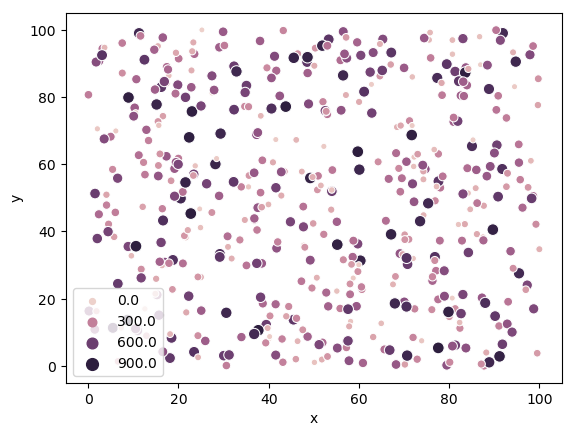

In [3]:
# scatter plot by seaborn
sns = PyCall.import_module('seaborn')
ax = sns.scatterplot(x: xs, y: ys, size: areas, hue: areas)
ax.set_xlabel('x')
ax.set_ylabel('y')
nil

# Rumale example

## Downloading data

In [4]:
system("wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/pendigits")
system("wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/pendigits.t")

true

## Load dataset

In [5]:
require 'rumale'
samples, labels = Rumale::Dataset.load_libsvm_file('pendigits')

[Numo::DFloat#shape=[7494,16]
[[47, 100, 27, 81, 57, 37, 26, 0, 0, 23, 56, 53, 100, 90, 40, 98], 
 [0, 89, 27, 100, 42, 75, 29, 45, 15, 15, 37, 0, 69, 2, 100, 6], 
 [0, 57, 31, 68, 72, 90, 100, 100, 76, 75, 50, 51, 28, 25, 16, 0], 
 [0, 100, 7, 92, 5, 68, 19, 45, 86, 34, 100, 45, 74, 23, 67, 0], 
 [0, 67, 49, 83, 100, 100, 81, 80, 60, 60, 40, 40, 33, 20, 47, 0], 
 [100, 100, 88, 99, 49, 74, 17, 47, 0, 16, 37, 0, 73, 16, 20, 20], 
 [0, 100, 3, 72, 26, 35, 85, 35, 100, 71, 73, 97, 65, 49, 66, 0], 
 [0, 39, 2, 62, 11, 5, 63, 0, 100, 43, 89, 99, 36, 100, 0, 57], 
 [13, 89, 12, 50, 72, 38, 56, 0, 4, 17, 0, 61, 32, 94, 100, 100], 
 [57, 100, 22, 72, 0, 31, 25, 0, 75, 13, 100, 50, 75, 87, 26, 85], 
 [74, 87, 31, 100, 0, 69, 62, 64, 100, 79, 100, 38, 84, 0, 18, 1], 
 [48, 96, 62, 65, 88, 27, 21, 0, 21, 33, 79, 67, 100, 100, 0, 85], 
 [100, 100, 72, 99, 36, 78, 34, 54, 79, 47, 64, 13, 19, 0, 0, 2], 
 [91, 74, 54, 100, 0, 87, 23, 59, 81, 67, 100, 39, 79, 4, 21, 0], 
 [0, 85, 38, 100, 81, 88, 87,

## Define a pipeline modoel

In [6]:
model = Rumale::Pipeline::Pipeline.new(steps: {
  rbf: Rumale::KernelApproximation::RBF.new(gamma: 0.0001, n_components: 800),
  svc: Rumale::LinearModel::SVC.new(reg_param: 0.0001, max_iter: 1000),
})

#<Rumale::Pipeline::Pipeline:0x00005611cd7ece00 @params={}, @steps={:rbf=>#<Rumale::KernelApproximation::RBF:0x00005611cd7edf58 @params={:gamma=>0.0001, :n_components=>800, :random_seed=>19314980861782589440446724991486101675}, @random_mat=nil, @random_vec=nil, @rng=#<Random:0x00005611cd7edc88>>, :svc=>#<Rumale::LinearModel::SVC:0x00005611cd7edbe8 @params={:reg_param=>0.0001, :fit_bias=>false, :bias_scale=>1.0, :max_iter=>1000, :batch_size=>20, :optimizer=>#<Rumale::Optimizer::Nadam:0x00005611cd7ed0f8 @params={:learning_rate=>0.01, :momentum=>0.9, :decay1=>0.9, :decay2=>0.999}, @fst_moment=nil, @sec_moment=nil, @decay1_prod=1.0, @iter=0>, :random_seed=>290364420607112474865524297799888070000, :probability=>false}, @weight_vec=nil, @bias_term=nil, @rng=#<Random:0x00005611cd7ecef0>, @prob_param=nil, @classes=nil>}>

## Define 5-fold cross validator

In [7]:
kf = Rumale::ModelSelection::StratifiedKFold.new(n_splits: 5, shuffle: true)
cv = Rumale::ModelSelection::CrossValidation.new(estimator: model, splitter: kf)

#<Rumale::ModelSelection::CrossValidation:0x00005611cd804b68 @estimator=#<Rumale::Pipeline::Pipeline:0x00005611cd7ece00 @params={}, @steps={:rbf=>#<Rumale::KernelApproximation::RBF:0x00005611cd7edf58 @params={:gamma=>0.0001, :n_components=>800, :random_seed=>19314980861782589440446724991486101675}, @random_mat=nil, @random_vec=nil, @rng=#<Random:0x00005611cd7edc88>>, :svc=>#<Rumale::LinearModel::SVC:0x00005611cd7edbe8 @params={:reg_param=>0.0001, :fit_bias=>false, :bias_scale=>1.0, :max_iter=>1000, :batch_size=>20, :optimizer=>#<Rumale::Optimizer::Nadam:0x00005611cd7ed0f8 @params={:learning_rate=>0.01, :momentum=>0.9, :decay1=>0.9, :decay2=>0.999}, @fst_moment=nil, @sec_moment=nil, @decay1_prod=1.0, @iter=0>, :random_seed=>290364420607112474865524297799888070000, :probability=>false}, @weight_vec=nil, @bias_term=nil, @rng=#<Random:0x00005611cd7ecef0>, @prob_param=nil, @classes=nil>}>, @splitter=#<Rumale::ModelSelection::StratifiedKFold:0x00005611cd804e88 @n_splits=5, @shuffle=true, @ra

## Perform 5-fold cross validation

In [8]:
report = cv.perform(samples, labels)

{:test_score=>[0.992, 0.9913333333333333, 0.9913333333333333, 0.9886591060707138, 0.9959866220735786], :train_score=>nil, :fit_time=>[3, 3, 3, 3, 3]}

## Output result

In [9]:
mean_accuracy = report[:test_score].inject(:+) / kf.n_splits
puts("5-CV mean accuracy: %.1f %%" % (mean_accuracy * 100.0))

5-CV mean accuracy: 99.2 %


## Calculate the score for test data

In [10]:
test_samples, test_labels = Rumale::Dataset.load_libsvm_file('pendigits.t')
accuracy = model.score(test_samples, test_labels)
puts("Accuracy: %.1f%%" % (100.0 * accuracy))

Accuracy: 98.2%
